# Welcome to using Python Notebooks for Geology/Hydrology Applications.
# Double Click in this box to view the code!


As you can see, its super simple - its basically just text, and some hashtags, with a few asterics here and there. This is a super simple language called **markdown.**
If you look toward the top of the page at the tool bar, you'll see a few buttons (Save, Insert Cell, Run, Etc.) and to the right, you'll see a drop down bar with the words "Markdown".
If you click on the drop down bar, you can see some other options - for this class, we will only be using the **"Markdown" and "Code"** options.
The "Code" option will be selected for cells that use Python code.

This box is called a **Cell** and it's basically a snippit of code that can run on its own.
To run a cell, you can press (CNTL+Enter) for Windows.
Alternatively, you can press (Shift+Enter) for Windows, and this runs the cell, AND moves you to the cell below.

Try it, press (CTRL+Enter) and then come back, and press (Shift+Enter)

So when you accidentally double-click a cell and it looks different - don't worry, you're in a markdown cell and you just need to run the cell.


# How Solutes are Transported in the Saturated Zone

So let's say we can have X-Ray vision and can see through the ground. 

- Beneath our feet we see: the unsaturated zone, then the water table, and finally the saturated zone. 
- Our concern is how sources of contamination, "solutes" are transported in the saturated zone with groundwater.
- The contamination from the source will spread through a process of **Hydrodynamic Dispersion.**

# Advection

A simple definition for advection is that it is the physical transport of a substance or quantity by bulk motion.

\begin{equation*}
v_x = -\frac{K}{n_e} * \frac{dh}{dl}
\end{equation*}

where:

\begin{equation*}
v_x = \textrm{average linear ground-water velocity} \\
\end{equation*}
\begin{equation*}
K = \textrm{hydraulic conductivity} \\
\end{equation*}
\begin{equation*}
n_e = \textrm{effective porosity} \\
\end{equation*}
\begin{equation*}
\frac{dh}{dl} = \textrm{hydraulic gradient} 
\end{equation*}

- Put simply, **advection is the movement of the groundwater through the soil**. Now were going to talk about how the **contaminant moves through the water**.

When we're talking about hydrodynamic dispersion, we must keep two things in mind: **Molecular Diffusion**, and **Mechanical Dispersion**. We will essentially **combine these two processes to give us hydrodyanmic dispersion.**


# Molecular Diffusion

When we have a container that starts with a concentration of a solute in one area, over time, that solute becomes evenly distributed in the container due to random molecular motion. The molecules go from higher concentration to lower concentration.

![alt text](MolecularDiffusion.png)

So that same kinda phenomenon is happening in the water/soil itself. The contaminant (solute) is going to be spreading itself among the solvent (water) to be more equally distributed in the water.



# Mechanical Dispersion

Mechanical dispersion is a phenomenon of groundwater moving through a porous medium, with the water travelling at different velocities at different points. The different velocities of water cause mixing. This is due to 3 things:

#### 1) fluids traveling faster through larger pores than through smaller pores

#### 2) fluids traveling shorter pathways and/or splitting or branching to the sides

#### 3) fluids moving faster through the center of the pores than along the edges 

![alt text](MechanicalDispersion1.jpg)


# Hydrodynamic Dispersion

So these two effects (mechanical dispersion, and molecular diffusion) cannot be practically distinguished between when looking at real world data, so instead we represent these phenomenon mathematically with the **Coefficient of Hydrodynamic Disperion**, or $D_L$.

\begin{equation*}
D_L = a_L v_x + D^*
\end{equation*}

Where:

\begin{equation*}
D_L = \textrm{longitudinal coefficient of hydrodynamic dispersion} \\
\end{equation*}
\begin{equation*}
a_L = \textrm{dynamic dispersivity} \\
\end{equation*}
\begin{equation*}
v_x = \textrm{average linear ground-water velocity} \\
\end{equation*}
\begin{equation*}
D^* = \textrm{effective molecular diffusion coefficient} 
\end{equation*}

Sometimes, in a problem we not given the dynamic dispersivity constant ($a_L$) directly, and so we need to calculate it with the following equation:

\begin{equation*}
a_L = 0.83(log L)^{2.414}
\end{equation*}

where: 

\begin{equation*}
L = \textrm{length of flow path (m)} 
\end{equation*}




# Determining concentration of contaminant from a constant source.


A common type of problem asked is when we know the initial concentration of a contaminant, the contaminant is a  constant source, and we are asked to find the contaminant concentration some x distance away, at some time.


This is the equation we would use, where erfc is the complementary error function:

$$C = \frac{C_o}{2}\left[ erfc (\frac{L-vt}{2\sqrt{Dt}}) + exp(\frac{vL}{D})erfc(\frac{L+vt}{2\sqrt{Dt}})\right]$$

We will need to find the following:


\begin{equation*}
C = \textrm{Solute Concentration }(mg/L) \\
\end{equation*}
\begin{equation*}
C_0 = \textrm{initial solute concentration }(mg/L) \\
\end{equation*}
\begin{equation*}
L = \textrm{flow path length }(m) \\
\end{equation*}
\begin{equation*}
v_x = \textrm{average linear ground-water velocity }(m/day) \\
\end{equation*}
\begin{equation*}
t = \textrm{time since release of solute }(day)\\ 
\end{equation*}
\begin{equation*}
D_L = \textrm{longitudinal coefficient of hydrodynamic dispersion }(m^2/s) 
\end{equation*}



In [7]:
## Now go ahead and click here and take a look at the top in the drop down menu. We are in the "code" setting now.
## Every text written here is being interpretted as code - but the hashtags at the start of the line tell the computer
## to ignore this and just interpret it as text. There's other ways to use hashtags more efficiently, but for now, just know that
## the hashtags basically just turn the code into pure text.

## The first thing we're going to do is import libararies. Libraries are basically collections of functions
## and information that's needed to do the things we want for the specific task at hand. For example, the math library allows 
## us to use exponential and square root calculations, while matplotlib.pyplot allows us to make graphs easily.

## Go ahead and run this cell by pressing (shift + enter) or (control + enter). [or whatever the equivalent is for you dirty mac and linus users)]

## You might notice the In[] text at the top left of the cell. This basically just tells you how many cells the kernal has run
## Every time you run a new cell, this number goes up. To restart the kernal, go towards the top of the page, click on the "kernal"
## button, and click "restart and clear output". If the In[*] text has an asteric like that, it means it is currently running.
## Sometimes, if your code is taking FOREVER, you may need to adjust the code because there's an infinite loop somewhere.
## To exit an infinite loop, restart the kernal.

import numpy as np
from scipy import special as sp
import math
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
print("Ready for Dispersion!")  ##This print function basically just shows you if everything ran correctly. If you see "Ready for Dispersion", you're on your way!

Ready for Dispersion!


# Example Problem

There's a landfill that is leaking leachate with a  chloride concentration of 725 mg/L, and it enters an aquifer with the following properties:


\begin{equation*}
\textrm{Hydraulic conductivity (K)} = 3.0 \times 10^{-5}(m/s) \\
\end{equation*}
\begin{equation*}
\textrm{Hydaulic Gradient (dh/dl)} = 0.0020 \\
\end{equation*}
\begin{equation*}
\textrm{Effective porosity }(n_e) = 0.23 \\
\end{equation*}
\begin{equation*}
\textrm{Effective Molectular Diffusion Constant }(D^*) = 1 \times 10^{-9} (m^2/s) 
\end{equation*}



Compute the concentration of chlorine in 1 year at a distance 15 meters from the point where the leachate entered the ground.

In [8]:
# Let's try to solve the problem above, by assigning some variables and doing a calculation - plug and chug style!
# We will inevitably need all the variable values from the concentration equation, Co, L, v_x, t , and D_L.
# We have Co, L, and t, given in the problem, but we need to calculate v_x and D_L.

# This is the exact question from page 406 of your text book (Applied Hydrology, 4th Edition by C.W. Fetter), and please use it
# as a resource to assist you with this process.

# Lets calculate v_x:
# This is how we assign a variable - we just use some letters followed by an equal sign, followed by some value.

C0 = 725
ne = 0.23
K = 3.0E-5  #this E is just 10 to the whatever power, in this case, 3.0 times ten to the negative 5th power.
dh_dl = 0.0020
d_star = 1.0E-9
L = 15

#########################################################################################################################


v_x = (K*dh_dl)/ne
#print(v_x)  ## This prints the answer out that is assigned to v_x, The first line of text after this block of code is
            ## the answer and should be about 2.6 x 10^-7 m/s

# Let's calculate longitudinal hydrodynamic dispersion now, which is needed for the D_L:

a_L = 0.83*((math.log(L,10))**(2.414))

#print(a_L) ## This prints out the answer assigned to a_L, the second line of text under this block, and should be about 1.23

D_L = a_L * v_x + d_star

#print(D_L) ## Again, prints out answer in third line, should be about 3.2E-7 

t = 1 *60 * 1440 * 365 ## converting time from one year to 3.15E7 seconds.

##########################################################################################################################

# So now we've got all the terms calcualted, and we just need to plug everything into the long equation with the complimentary 
# error functions. It's on page 404 in the textbook, and is equation 10.8.


#Just to keep your sanity and mine, I split the expression up into 3 parts so its hopefully easier to follow along.

term1 = (L - v_x*t)/(2*math.sqrt(D_L*t))
term2 = (v_x*L)/(D_L)
term3 = (L+v_x*t)/(2*math.sqrt(D_L*t))

print (term1)
print (term2) 
print (term3) ## this term is about 3.6, and since complimentary error functions of numbers greater than 3 are very small, we can ignore the last term. 
 
C = (C0/2) * (math.erfc(term1)) ## + math.exp(term2) * math.erfc(term3))  <-- we're ignoring this last term as they did in the book.
              
print(C) ##You should see we get an answer of about 48 mg/L. This is due to rounding errors from the calculations.






1.0639267741942695
12.179086599044652
3.6484279874888683
48.002933437865316


# Question 1:

A Saline Solution with a concentration of 1823 mg/L is introduced into a 2m-long sand column in which the pores are initially filled with distilled water. If the solution drains through the columnn at an average linear velocity of 1.43m/day and the dynamic dispersivity of the sand column is 15 cm, what would the concentration of the efflulent be 0.7 days after flow begins?
Try to use the above code to calculate the answer to the question.

# Functions:

So far, we've basically just used python as a glorified calculator.... not really using it to its full potential.
Now we're going to take the code that we used for the last question, and we're going to turn it into a **function**.

Basically, a function is reusable code that is deisgned to perform a single, related action. Functions let us do TONS of things, but for this lesson, we're going to make a function that solves for the concentration of a contaminent at some distance after some time.

For the purposes of this session, we're not going to go into too much detail regarding the specifics of how to create a function, we're just going to go over the main components and how to use it. You just need to know 

Let's consider a simple function - one that calculates the volume of a cylinder.


In [3]:
def cylinder_volume(height=3, radius=2):   # This is the function header - always end with a colon
    pi = 3.14159                           # This line is the start of the function body, and just defines a variable - notice the indent
    return height * pi * radius ** 2       # This line is the end of the function body, and is the return statement.
print(cylinder_volume())

37.699079999999995


Let's start with the function header, which is the first line of a function definition.


The **function header** always starts with the def keyword, which indicates that this is a function definition.
Then comes the function name (here, cylinder_volume), which follows the same naming conventions as variables. You can revisit the naming conventions below.
Immediately after the name are parentheses that may include **arguments** separated by commas (here, height and radius). **Arguments, or parameters, are values that are passed in as inputs when the function is called, and are used in the function body.** If a function doesn't take arguments, these parentheses are left empty.
The header always end with a colon :.

The **body of a function is the code indented after the header line**. Here, it's the two lines that define pi and return the volume.
Within this body, we can refer to the argument variables and define new variables, which can only be used within these indented lines.
The body will often include a **return statement**, which is used to send back an output value from the function to the statement that called the function. A return statement consists of the return keyword followed by an expression that is evaluated to get the output value for the function. If there is no return statement, the function simply returns None.


[Here](https://classroom.udacity.com/courses/ud1110/lessons/49912e64-4fe1-4f06-8679-d17d4ad33969/concepts/97c1d194-e640-4dda-b7c8-770db5a4cb0f) is a nice free resource for any basic programming/function questions you may have.




# Solving Q1 with a function.

Now, lets just try to solve question 1, but using a function that we define below. All you need to do is set the arguments.


In [6]:
def Concen_cal(C0=725,L=15,t=3.15E7,DL=3.2E-7,vx = 2.6E-7,k=3.0E-5):

    C0 = 725
    ne = 0.23
    k = 3.0E-5  
    dh_dl = 0.0020
    d_star = 1.0E-9
    L = 15
    
    v_x = (k*dh_dl)/ne
    a_L = 0.83*((math.log(L,10))**(2.414))
    D_L = a_L * v_x + d_star
    
    
    term1 = (L - vx*t)/(2*math.sqrt(DL*t))
    term2 = (vx*L)/(DL)
    term3 = (L+vx*t)/(2*math.sqrt(DL*t))
    
    print (term1)
    print (term2)
    print (term3)
    
    C = (C0/2) * math.erfc(term1) + math.exp(term2) * math.erfc(term3)
    
   
    return C

print(Concen_cal())


1.0724741921636822
12.1875
3.652081720451658
46.93319242369629


# Question 2:

Given the flow situation of problem 1, change the linear velocity such that the concentration at 0.7 days is within 0.5 mg/L of 24 mg/L. What is that linear velocity?

Similarly, keep the linear velocity at the initial 1.43 m/day. What is the time needed to have the saline solution concentration at 300 mg/L 2 meters away?

# Question 3:

A landfill is leaking an effluent with a concentration of sodium of 1250 mg/L. It seeeps into an aquifer with a hydraulic conductivity of 9.8 m/day, a gradient of 0.0040, and an effective porosity of 0.15. A down-gradient monitoring well is located 25 m from the landfill. What would the sodium concentration be in this monitoring well 300 days after the leak begins?

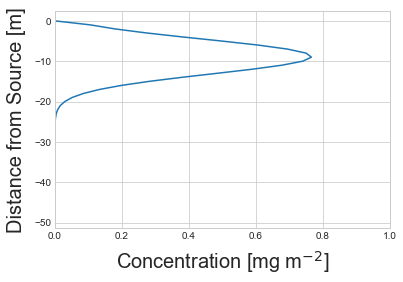

In [9]:

#Analytical Solution for Solute Transport Problem

def solute_pulse(): 
    Co = 725 # initial solute concentration in milligrams 
    Days = 365 # Time since start
    D = 0.028 # Dispersion Coefficient
    v = 0.022 # Average linear groundwater velocity
    n = 50
    sqrtPi = np.sqrt(np.pi)
    Di = np.zeros(n) # Distance away from source in meters
    conc = np.zeros(n)
    
    for i in range(n):
        Di[i] = i
    
    plt.ion()
    conc[0] = 0.0
    
    for t in range(1, Days):
        for i in range(1, n):
            a = v / (sqrtPi*np.sqrt(D*t)) * np.exp(-((Di[i] - v*t)**2) / (4.0*D*t))
            b = (v**2)/(2*D) * np.exp((v*Di[i])/D) * sp.erfc((Di[i]+v*t) / np.sqrt(4.0*D*t))
            conc[i]= (Co / 2) * (a - b)
            
            ###################
            # a = math.erfc((L[i] - (v*t)) / (2* (math.sqrt(D*t))))
            # b = math.exp((v*L[i])/(D)) * math.erfc((L[i] + (v*t)) / (2*(math.sqrt(D*t))))
            # conc[i]= (Cnot/2) * (a+b)
            ###################
            
        plt.clf()
        plt.xlabel('Concentration [mg m$^{-2}$]', fontsize=20, labelpad=8)
        plt.ylabel('Distance from Source [m]',fontsize=20, labelpad=8)
        plt.xlim(0, 1)
        plt.plot(conc, -Di)
        plt.draw()
    
    plt.ioff()
    plt.show

def main():
    solute_pulse()
main()


In [10]:
#The parameters
Co = 725 # initial solute concentration in milligrams 
t = 365 # Time since start
D = 0.0275 # Dispersion Coefficient
v = 0.0224 # Average linear groundwater velocity
Di = 15 # Distance away from source in meters     

def part1(Co, t, D, v, Di):
  return(math.erfc((Di - (v*t)) / (2* (math.sqrt(D*t)))))
part1(Co = 725, t = 365, D = 0.0275, v = 0.0224, Di = 15) # passed by explicit name

0.12774875825775006

In [11]:
def part2(Co, t, D, v, Di):
  return(math.exp((v*Di)/(D)) * math.erfc((Di + (v*t)) / (2*(math.sqrt(D*t)))))
part2(Co = 725, t = 365, D = 0.0275, v = 0.0224, Di = 15)

0.04672888312009826

In [12]:
def part1and2(Co, t, D, v, Di):
  return((Co/2)*(math.erfc((Di-(v*t))/(2*(math.sqrt(D*t)))))+math.exp((v*Di)/(D))*math.erfc((Di + (v*t))/(2*(math.sqrt(D*t)))))
part3(Co = 725, t = 365, D = 0.0275, v = 0.0224, Di = 15) # passed by explicit name

NameError: name 'part3' is not defined

### You Try!
A saline solution with a concentration of __1823 mg/L__, is introduced into a __2 m__ long sand column. The pores are initially filled with distilled water.

The solution drains through the column at an average linear velocity of __1.43 m/d__ and the dynamic dispersivity is __0.25585 m<sup>2</sup> d<sup>-1</sup>__,

What would the concentration of the effluent be __0.70 day__ after flow begins?

In [ ]:
def sol_conc(Co, t, D, v, Di):
  return((Co/2)*(math.erfc((Di-(v*t))/(2*(math.sqrt(D*t)))))+math.exp((v*Di)/(D))*math.erfc((Di + (v*t))/(2*(math.sqrt(D*t)))))
part3(Co = , t = , D = , v = , Di = ) # Insert the values here

In [ ]:
The concentration of the effluent would be what after 0.70 days?

In [ ]:
##Analytic Solution

def solute_pulse():
    tmax = 11
    Seconds = 3150
    n = 20
    D = 0.00000032 #Dispersion Coefficient
    v = 0.00000026 # Average linear groundwater velocity
    Cnot = 0.725 #initial solute concentration
    L = np.zeros(n)
    conc = np.zeros(n)
    sqrtPi = np.sqrt(np.pi)
    for i in range(n):
        L[i] = i
    plt.ion()
    conc[0] = 0.0
    for t in range(1, Seconds):
        for i in range(1, n):
            a = sp.erfc((L[i] - (v * t)) / (2* (np.sqrt(D * t))))
            b = np.exp((v * L[i]) / (D)) * sp.erfc((L[i] + (v * t)) / (2 * (np.sqrt(D * t))))
            conc[i]= (Cnot/2) * (a + b)
        plt.clf()
        plt.xlabel('Concentration [g m$^{-2}$]', fontsize=20, labelpad=8)
        plt.ylabel('Length [m]',fontsize=20, labelpad=8)
        plt.xlim(0, 2)
        plt.plot(conc, L, 'k-')
        plt.draw()
    plt.ioff()
    plt.show
    a = input()
plt.savefig("analytical.eps", transparent = True)
def main():
    solute_pulse()
main()
print("done")

In [ ]:
#Analytical Solution for Solute Transport Problem

def solute_pulse(): 
    Co = 725 # initial solute concentration in milligrams 
    Days = 365 # Time since start
    D = 0.028 # Dispersion Coefficient
    v = 0.022 # Average linear groundwater velocity
    n = 50
    sqrtPi = np.sqrt(np.pi)
    Di = np.zeros(n) # Distance away from source in meters
    conc = np.zeros(n)
    
    for i in range(n):
        Di[i] = i
    
    plt.ion()
    conc[0] = 0.0
    
    for t in range(1, Days):
        for i in range(1, n):
            a = v / (sqrtPi*np.sqrt(D*t)) * np.exp(-((Di[i] - v*t)**2) / (4.0*D*t))
            b = (v**2)/(2*D) * np.exp((v*Di[i])/D) * sp.erfc((Di[i]+v*t) / np.sqrt(4.0*D*t))
            conc[i]= (Co / 2) * (a - b)
            
            ###################
            # a = math.erfc((L[i] - (v*t)) / (2* (math.sqrt(D*t))))
            # b = math.exp((v*L[i])/(D)) * math.erfc((L[i] + (v*t)) / (2*(math.sqrt(D*t))))
            # conc[i]= (Cnot/2) * (a+b)
            ###################
            
    plt.clf()
    plt.xlabel('Concentration [mg m$^{-2}$]', fontsize=20, labelpad=8)
    plt.ylabel('Distance from Source [m]',fontsize=20, labelpad=8)
    plt.xlim(0, 1)
    plt.plot(conc, -Di)
    plt.draw()
    
    plt.ioff()
    plt.show

def main():
    solute_pulse()
main()